# Telecommunication Industry User Churn Prediction
## Author: Ben (www.linkedin.come/in/ben-usc)

### **In** this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

### Data source: http://www.dataminingconsultant.com/

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
</ul>

# Part 0: The following code loads data from Google drive, don't run or comment out this code snippet if run locally.

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

trainFile = "./Kaggle-Telco-Customer-Churn.csv"

## google drive link for churn prediction: https://drive.google.com/open?id=1n6zVhI7gHCwj7KbQ4eUoJzjXUazgku0f

## create google drive files:
file1 = drive.CreateFile({'id': '1n6zVhI7gHCwj7KbQ4eUoJzjXUazgku0f'}) # replace the id with id of file you want to access
file1.GetContentFile(trainFile)

# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [1]:
import pandas as pd
## will show all the columns
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


## ignore warnings:
import warnings
warnings.filterwarnings('ignore')

trainFile = "./Kaggle-Telco-Customer-Churn.csv"

## read CSV data:
data = pd.read_csv(trainFile)

data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


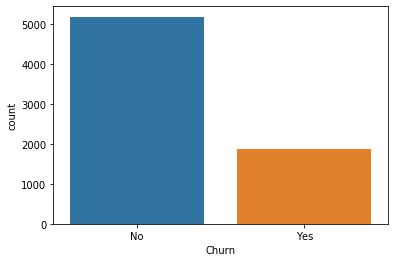

What is the value counts for column 'Churn'? And what is churn rate?
No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


In [2]:
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data = data)
plt.show()

print("What is the value counts for column 'Churn'? And what is churn rate?")
print(data['Churn'].value_counts())
print(data['Churn'].value_counts()/len(data))

In [ ]:
#data.describe()
#data.info()

In [3]:
print ("Missing values ?:  ",  data.isnull().sum().values.sum())
print ("Unique values ?: \n", data.nunique())

Missing values ?:   0
Unique values ?: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Part 1.2: Data exploring and cleaning

In [ ]:
# Note that there are white spaces in the strings
#data.intl_plan = data.intl_plan.map({' no': 0, ' yes':1})
#data.voice_mail_plan = data.voice_mail_plan.map({' no': 0, ' yes':1})
#data.churned = data.churned.map({' False.': 0, ' True.':1})

In [4]:
import plotly
plotly.__version__

'4.1.1'

In [5]:
labels = data["Churn"].value_counts().keys().tolist()
values = data["Churn"].value_counts().values.tolist()

#fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
#fig.update_layout(autosize=True)

#pie_data = [go.Pie(labels = labels, values = values, hoverinfo = "label+value+text", hole = .4)]
pie_data = [go.Pie(labels = labels, values = values, hole = .4, hoverinfo="skip")]
layout = go.Layout(dict(title = "Customer churn in data",))

fig = go.Figure(data = pie_data, layout = layout)
#fig.update_traces(textposition='top center')

fig.update_layout(height = 400, width = 400)
#py.iplot(fig)
fig.show()

## Check distribution of data for some features: how this feature is distributed for churned and not-churned customers respectively?

In [255]:
from plotly.subplots import make_subplots

#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})
## select data
churn = data.loc[data['Churn'] == "Yes"]
no_churn = data.loc[data['Churn'] == "No"]

def feature_pie(feature):
    labels_1 = churn[feature].value_counts().keys().tolist()
    values_1 = churn[feature].value_counts().values.tolist()

    labels_2 = no_churn[feature].value_counts().keys().tolist()
    values_2 = no_churn[feature].value_counts().values.tolist()
    
    ## Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels = labels_1, values = values_1), 1, 1)
    fig.add_trace(go.Pie(labels = labels_2, values = values_2), 1, 2)
    ## Use hole to create a donut-like pie chart
    fig.update_traces(hole = .4, hoverinfo = "skip")
    ## layout info
    fig.update_layout(title_text = feature + " distribution in customer churn",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churned', x=0.18, y=0.5, font_size=13, showarrow=False),
                 dict(text='Not Churned', x=0.85, y=0.5, font_size=13, showarrow=False)])
    fig.update_layout(height = 400, width = 800)
    fig.show()


In [237]:
## define barplot method to visualize data distribution, just a different way as pie chart
def feature_barplot(feature):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    data_1 = churn[feature].value_counts(normalize=True).rename('percentage')\
                           .mul(100).reset_index().rename(columns={'index':feature})
    data_2 = no_churn[feature].value_counts(normalize=True).rename('percentage')\
                           .mul(100).reset_index().rename(columns={'index':feature})
    sns.barplot(x = feature, y = "percentage", data = data_1, ax = axes[0])
    axes[0].set_title("Churned customers")
    sns.barplot(x = feature, y = "percentage", data = data_2, ax = axes[1])
    axes[1].set_title("Non-churned customers")
    plt.show()    

In [232]:
feature_pie("gender")

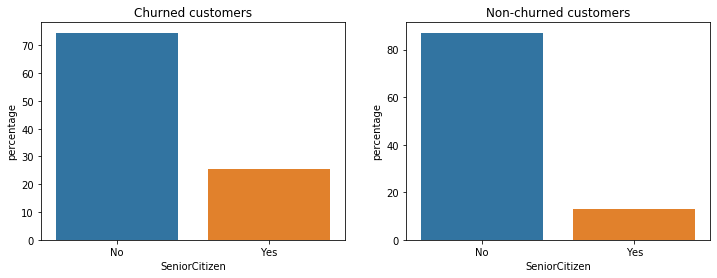

In [256]:
feature_barplot("SeniorCitizen")

In [233]:
feature_pie("Partner")

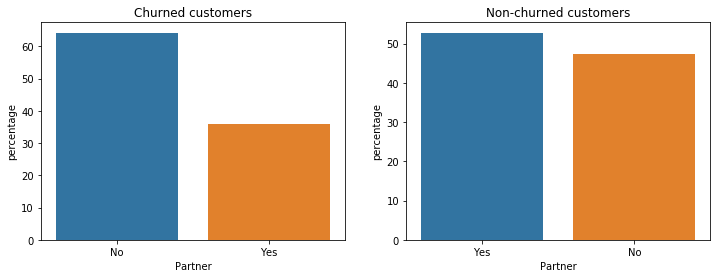

In [239]:
feature_barplot("Partner")

In [234]:
feature_pie("Dependents")

In [235]:
feature_pie("PhoneService")

In [236]:
feature_pie("MultipleLines")

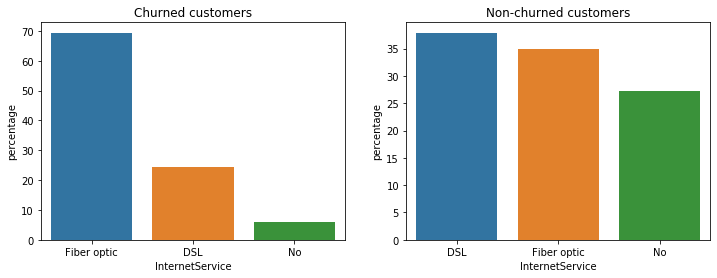

In [240]:
feature_barplot("InternetService")

In [241]:
feature_pie("OnlineSecurity")

In [242]:
feature_pie("OnlineBackup")

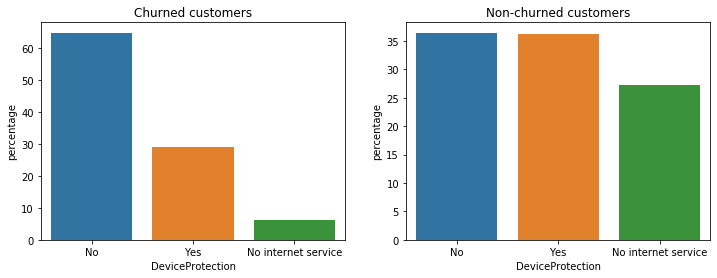

In [243]:
feature_barplot("DeviceProtection")

In [244]:
feature_pie("TechSupport")

In [245]:
feature_pie("StreamingMovies")

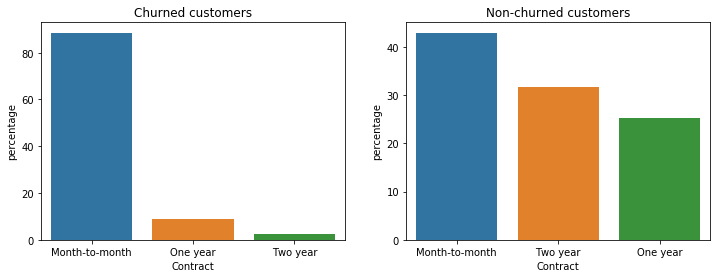

In [246]:
feature_barplot("Contract")

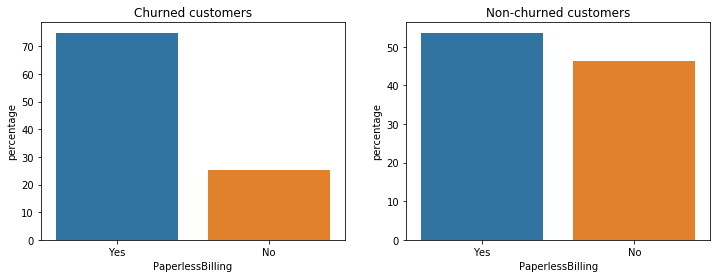

In [247]:
feature_barplot("PaperlessBilling")

In [248]:
feature_pie("PaymentMethod")

In [90]:
#data.groupby(['tenure', 'Churn']).size().unstack()\
#        .plot(kind='bar', title="tenure distribution for churn data", figsize=(12,6))
#plt.ylabel('count')
#plt.xlabel('tenure')

#function for plotting histogram with certain column in customer attrition data:

def feature_hist(column) :
    
    trace1 = go.Histogram(x = churn[column], histnorm = "percent", name = "Churned Customers",
                          marker = dict(line = dict(width = .5, color = "black")), hoverinfo = 'skip')
    trace2 = go.Histogram(x = no_churn[column], histnorm = "percent", name = "Non-churned Customers",
                          marker = dict(line = dict(width = .5, color = "black")), hoverinfo = 'skip')
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = column, zerolinewidth = 1,
                                             ticklen = 5, gridwidth = 2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = "percent", zerolinewidth = 1,
                                             ticklen = 5, gridwidth = 2)))
    fig  = go.Figure(data = [trace1, trace2],layout = layout)
    py.iplot(fig)

In [91]:
feature_hist("tenure")

In [92]:
feature_hist("MonthlyCharges")

In [95]:
feature_hist("TotalCharges")

## Need to be careful with feature 'TotalCharges', due to the white space

In [123]:
## replacing white spaces with NaN
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
print(f"Only {round(sum(data['TotalCharges'].isna())/len(data)*100, 3)}% of the 'TotalCharges' is NaN")

## drop null values from total charges column:
data = data[~data["TotalCharges"].isna()]
data = data.reset_index()[data.columns]
      
## convert to float type
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

Only 0.156% of the 'TotalCharges' is NaN


In [125]:
# Compare the median of numeric features between the two classes
data.groupby('Churn').median()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0,38,64.45,1683.60
Yes,0,10,79.65,703.55


In [147]:
def scatter_matrix(data, features)  :
    classes = data["Churn"].unique().tolist()
    class_map  = {classes[k] : k for k in range(len(classes))}
    class_colors = ["red" if cl == "Yes" else "blue" for cl in data["Churn"]]
    
    trace = go.Splom(dimensions = [dict(label = features[0], values = data[features[0]]),
                                   dict(label = features[1], values = data[features[1]]),
                                   dict(label = features[2], values = data[features[2]])],
                     hoverinfo = "skip",
                     marker = dict(color = class_colors, #colorscale = 'Portland',
                                   size = 3,
                                   showscale = False))
    
    layout = go.Layout(dict(title  = "Scatter plot for numerical features in data",
                            autosize = False,
                            height = 800, width = 800,
                            dragmode = "select"))
    fig = go.Figure(data = [trace], layout = layout )
    py.iplot(fig)

In [148]:
scatter_matrix(data, ["tenure", "MonthlyCharges", "TotalCharges"])

## Check the feature 'tenure', see how the histogram looks like aross different bins

In [215]:
#%matplotlib inline
## features contain 3 strings: ["tenure", "MonthlyCharges", "TotalCharges"]

def dist_plot(data, features):
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    colors = ['r', 'g', 'b']
    for i in range(len(features)):
        sns.distplot(data.loc[data.Churn == "Yes", features[i]],\
                     kde = True, label = "Churned", ax = axes[i], color = 'r', hist_kws = {"alpha":0.5})
        sns.distplot(data.loc[data.Churn ==  "No", features[i]],\
                     kde = True, label = "Non-churned", ax = axes[i], color = 'b', hist_kws = {"alpha":0.5})
        axes[i].legend(loc="upper right")

    fig.suptitle("Numerical feature distribution among churned and not-churned customers", fontsize=20)
    fig.subplots_adjust(top=0.85)
    plt.show()

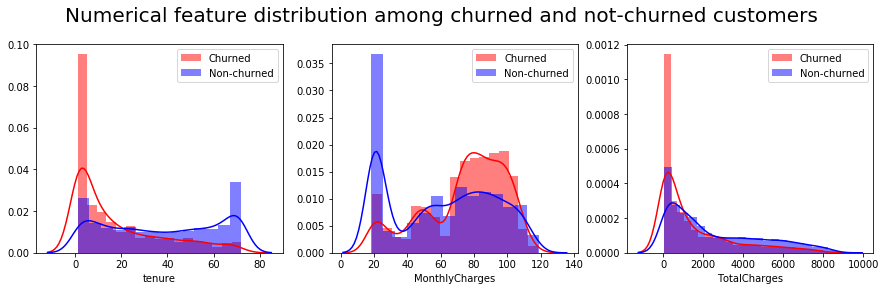

In [216]:
dist_plot(data, ["tenure", "MonthlyCharges", "TotalCharges"])

In [378]:
# Tenure to categorical column
def tenure_group(data) :
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "Tenure_24-36"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "Tenure_36-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    else :
        return "Tenure_>_60"

data["tenure_group"] = data.apply(lambda data:tenure_group(data), axis = 1)

In [381]:
## replace label string as integer:
data["Churn"] = data["Churn"].replace({"Yes":1,"No":0})

## separate data (do it again is because I grouped tenure column)
churn = data.loc[data['Churn'] == 1]
no_churn = data.loc[data['Churn'] == 0]

In [382]:
#cusomer attrition in tenure groups
churn_tg  =  churn["tenure_group"].value_counts().reset_index()
churn_tg.columns  = ["tenure_group","count"]

no_churn_tg =  no_churn["tenure_group"].value_counts().reset_index()
no_churn_tg.columns = ["tenure_group","count"]

## churned customers:
trace1 = go.Bar(x = churn_tg["tenure_group"]  , y = churn_tg["count"], name = "Churned customers",
                marker = dict(line = dict(width = .5, color = "black")), opacity = .9, hoverinfo = "skip")

## non-churned customers:
trace2 = go.Bar(x = no_churn_tg["tenure_group"] , y = no_churn_tg["count"], name = "Non-churned Customers",
                marker = dict(line = dict(width = .5, color = "black")), opacity = .9, hoverinfo = "skip")

layout = go.Layout(dict(title = "Sample size for tenure groups in the dataset",
                        xaxis = dict(title = "tenure group", zerolinewidth = 1, ticklen = 5, gridwidth = 2),
                        yaxis = dict(title = "count", zerolinewidth = 1, ticklen = 5, gridwidth = 2)))

fig  = go.Figure(data = [trace1,trace2], layout = layout)
py.iplot(fig)

## Data preprocessing

In [383]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           6
dtype: int64

In [389]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_col = ["Churn"] ## label column

to_be_dropped = ["customerID", "Churn"] ## some columns will be dropped

## categorical columns:
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()
bin_cols.remove("Churn")
cat_cols = data.nunique()[data.nunique() < 7].keys().tolist()
for tmp in bin_cols: cat_cols.remove(tmp)
cat_cols.remove("Churn")

## numerical columns:
num_cols   = [x for x in data.columns if x not in cat_cols + bin_cols + to_be_dropped]

## use get_dummies for One-Hot Encoding:
new_data = pd.get_dummies(data = data, columns = cat_cols)

#Label encoding Binary columns
encoder = LabelEncoder()
for col in bin_cols: new_data[col] = encoder.fit_transform(new_data[col])

## Scale the numerical columns
scaler = StandardScaler()
scalled_cols = scaler.fit_transform(data[num_cols].values)
new_data[num_cols] = scalled_cols


## Correlation matrix:

In [363]:
#print ("Missing values ?: ")
#print(new_data.isnull().sum())

In [391]:
## correlations between features
columns = sorted(list(set(new_data.columns) - set({"customerID"})))
corr = new_data[columns].corr()
corr_array = np.array(corr)
## corr_array.shape is (53, 53)

#Plotting
trace = go.Heatmap(z = corr_array, x = columns, y = columns,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient", titleside = "right"))

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height = 800, width = 900, margin  = dict(r = 0, l = 210, t = 40, b = 210),
                        xaxis = dict(tickfont = dict(size = 9)), yaxis = dict(tickfont = dict(size = 9))))

fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

## show heapmap of correlations
#sns.heatmap(corr_array, cmap="YlGnBu")

## Visualizing the dataset with PCA

In [392]:
new_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [397]:
from sklearn.decomposition import PCA

to_be_dropped = ['customerID', 'Churn']
X = new_data[[i for i in new_data.columns if i not in to_be_dropped]]
Y = new_data['Churn']

pca = PCA(n_components = 2)
components = pca.fit_transform(X)

pca_data = pd.DataFrame(components, columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y, left_index = True, right_index = True, how = "left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn=Yes",0:"Churn=No"})

def pca_scatter(target, color) :
    trace = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                       y = pca_data[pca_data["Churn"] == target]["PC2"],
                       name = target, mode = "markers", hoverinfo = "skip",
                       marker = dict(color = color, line = dict(width = .5), symbol =  "diamond-open"),)
    return trace

layout = go.Layout(dict(title = "Visualising data with principal components",
                        xaxis = dict(title = "principal component 1", zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(title = "principal component 2", zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 600))

trace1 = pca_scatter("Churn=Yes", "red")
trace2 = pca_scatter("Churn=No", "blue")

fig = go.Figure(data = [trace2,trace1], layout = layout)
py.iplot(fig)

In [399]:
# calculate correlation for two-feature pairs:
from scipy.stats import pearsonr
import itertools

pearsonCols = set(data.columns)
pearsonCols.remove("Churn")

for feature in pearsonCols:
    try:
        pearson_coeff = pearsonr(data[feature], data['Churn'])
        print("(Pearson correlation, p-value) between churned and " + feature + ": ", pearson_coeff)
    except:
        continue

(Pearson correlation, p-value) between churned and MonthlyCharges:  (0.1928582184700788, 6.760843117999019e-60)
(Pearson correlation, p-value) between churned and TotalCharges:  (-0.19948408356756417, 4.8768656897080145e-64)
(Pearson correlation, p-value) between churned and tenure:  (-0.35404935895325096, 9.437650217603554e-207)


# Part 2: Feature Preprocessing

In [400]:
new_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-36,tenure_group_Tenure_36-48,tenure_group_Tenure_48-60,tenure_group_Tenure_>_60
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [0]:
## Get labels:
Y = new_data["Churn"].values

## Drop some columns:
preX = data.drop(["customerID", "Churn"], axis=1)

preX.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,intl_plan_0,intl_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [0]:
# check the propotion of y = 1 in the sample:
print("The percentage of 1 among all lables: " + str(Y.sum() / Y.shape[0] * 100) + "%")

The percentage of 1 among all lables: 14.14%


In [0]:
preX.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [0]:
## train-test split: reserve 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(preX, Y, test_size = 0.2, random_state=0)

In [0]:
# Scale the training and test data independently:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_1 = ['account_length',      'number_vmail_messages', 'total_day_minutes',  'total_day_calls',
           'total_day_charge',    'total_eve_minutes',     'total_eve_calls',    'total_eve_charge',
           'total_night_minutes', 'total_night_calls',     'total_night_charge', 'total_intl_minutes',
           'total_intl_calls',    'total_intl_charge',     'number_customer_service_calls']

scalled_X_train = scaler.fit_transform(X_train[columns_1].values)
X_train[columns_1] = scalled_X_train

scalled_X_test  = scaler.fit_transform(X_test[columns_1].values)
X_test[columns_1] = scalled_X_test

In [0]:
X_train.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,intl_plan_0,intl_plan_1,voice_mail_plan_0,voice_mail_plan_1
2913,2.137203,-0.573340,-0.755170,-0.384644,-0.755450,0.967015,0.732461,0.967671,-0.839650,-1.037798,-0.841709,0.188925,-0.173917,0.193604,-0.441555,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3275,0.498045,1.435442,-0.960695,0.773846,-0.960213,-0.734231,-0.472533,-0.735329,0.855891,1.058512,0.855623,-3.718191,-1.797415,-3.719287,-0.441555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [0]:
print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 73 features
test data has 1000 observation with 73 features


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training and Selection: Logistic Regression, K-Nearest Neighbors, Random Forest, Support Vector Machine and Gradient Boosting

In [0]:
#import models:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

# Logistic Regression
classifier_LR = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier(random_state = 0)

## support vector machine:
classifier_SVM = SVC()

## Gradient boosting:
classifier_GB = XGBClassifier(random_state=0)

In [0]:
# Train the model
classifier_LR.fit(X_train, Y_train)
print("Test logistic regression: accuracy is ", classifier_LR.score(X_test, Y_test))

Test logistic regression: accuracy is  0.873


In [0]:
# Use 5-fold Cross Validation to get the accuracy for all three models
model_names = ["Logistic Regression", "KNN", "Random Forest", "Support Vector Machine", "Gradient Boosting"]
model_list = [classifier_LR, classifier_KNN, classifier_RF, classifier_SVM, classifier_GB]

for i in range(len(model_list)):
    classifier = model_list[i]
    cv_score = model_selection.cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Accuracy for " + model_names[i] + " is: ",cv_score.mean())

Accuracy for Logistic Regression is:  0.863000851173205
Accuracy for KNN is:  0.8902496167962763
Accuracy for Random Forest is:  0.930751829690359
Accuracy for Support Vector Machine is:  0.8907505578133715
Accuracy for Gradient Boosting is:  0.9504999687499511


### Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [0]:
#import sys
#!{sys.executable} -m pip install xgboost

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

# helper function for printing out grid search results 
def print_grid_metrics(model_name, grid, param):
    #print("For " + model_name + ": ")
    print (model_name + ": Best AUC score: %0.3f" % grid.best_score_)
    #print (model_name + ": Best parameters set:")
    best_params = grid.best_params_
    param_set = []
    for param_name in sorted(param.keys()):
        #print("\t\t%s: %r" % (param_name, best_params[param_name]))
        param_set.append((param_name, best_params[param_name]))
    print (model_name + ": Best parameters set: ", param_set)
    return

In [0]:
# Possible hyperparamter options for four models

model_names = ["Logistic Regression", "K-Nearest Neighbor", "Random Forest", "Gradient Boosting"]

models = [ LogisticRegression(),
           KNeighborsClassifier(),
           RandomForestClassifier(random_state = 0),
           XGBClassifier(random_state=0) ]

params = [ {'penalty':('l1', 'l2'), 'C':(0.01, 0.1, 1, 5, 10)},
           {'n_neighbors':[3,4,5,6,8,10], 'weights': ['uniform','distance']},
           {'n_estimators' : [40,60,80,100]},
           {'learning_rate': [0.01, 0.02,0.05, 0.1], 'reg_lambda': [0.1,0.5,1,2], 'reg_alpha': [0, 0.1,1,2]
}]

best_models = []

for i in range(len(models)):
    model_name, model, param = model_names[i], models[i], params[i]
    model_grid = GridSearchCV( model, param, cv = 5, scoring='roc_auc')
    model_grid.fit(X_train, Y_train)
    print_grid_metrics(model_names[i], model_grid, params[i])
    best_models.append(model_grid.best_estimator_)
    

Logistic Regression: Best AUC score: 0.829
Logistic Regression: Best parameters set:  [('C', 1), ('penalty', 'l1')]
K-Nearest Neighbor: Best AUC score: 0.846
K-Nearest Neighbor: Best parameters set:  [('n_neighbors', 10), ('weights', 'distance')]
Random Forest: Best AUC score: 0.921
Random Forest: Best parameters set:  [('n_estimators', 80)]
Gradient Boosting: Best AUC score: 0.923
Gradient Boosting: Best parameters set:  [('learning_rate', 0.1), ('reg_alpha', 2), ('reg_lambda', 1)]


### Part 3.3: Model Evaluation - Confusion Matrix (Accuracy, Precision, Recall)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def compute_scores(model_name, conf_matrix):
    
    tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    
    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    print ("For " + model_name + ":")
    print ("\tAccuracy is: %0.3f" % accuracy)
    print ("\tprecision is: %0.3f" % precision)
    print ("\trecall is: %0.3f" % recall)

# print out confusion matrices
def plot_conf_matrix(ax, model_name, conf_matrx):
    
    class_names = ['Not Churned','Churned']
    compute_scores(model_name, conf_matrix)
    
    cax = ax.matshow(conf_matrix, interpolation='nearest',cmap = "Reds")
    plt.colorbar(cax, ax=ax)
    
    ax.set_title("Confusion matrix for " + model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)


For Logistic Regression:
	Accuracy is: 0.870
	precision is: 0.463
	recall is: 0.198
For K-Nearest Neighbor:
	Accuracy is: 0.902
	precision is: 0.868
	recall is: 0.262
For Random Forest:
	Accuracy is: 0.965
	precision is: 0.960
	recall is: 0.754
For Gradient Boosting:
	Accuracy is: 0.965
	precision is: 0.933
	recall is: 0.778


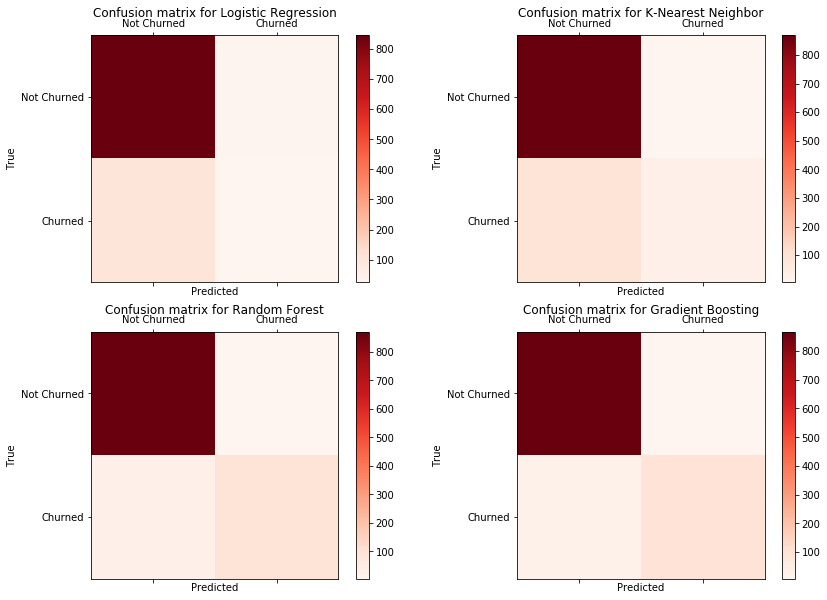

In [0]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for all four models:

fig, axes = plt.subplots(2,2, figsize=(14,10))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

for i in range(len(best_models)):
    model_name = model_names[i]
    model = best_models[i]
    conf_matrix = confusion_matrix(Y_test, model.predict(X_test))
    plot_conf_matrix(axis[i], model_name, conf_matrix)

#plt.tight_layout()
plt.show()

## Part 3.4: Model Evaluation - ROC & AUC

## Logistic Regression, KNN, Random Forest and XGboost all have predict_prob() function

In [0]:
# define function for plotting ROC curve
def ROC_curve(model_name, ax, fpr, tpr):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, label = model_name)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve - ' + model_name)
    ax.legend(loc='best')
    return

AUC for Logistic Regression:  0.8128564164033272
AUC for K-Nearest Neighbor:  0.8277305582797574
AUC for Random Forest:  0.9165576985943118
AUC for Gradient Boosting:  0.9322945043768842


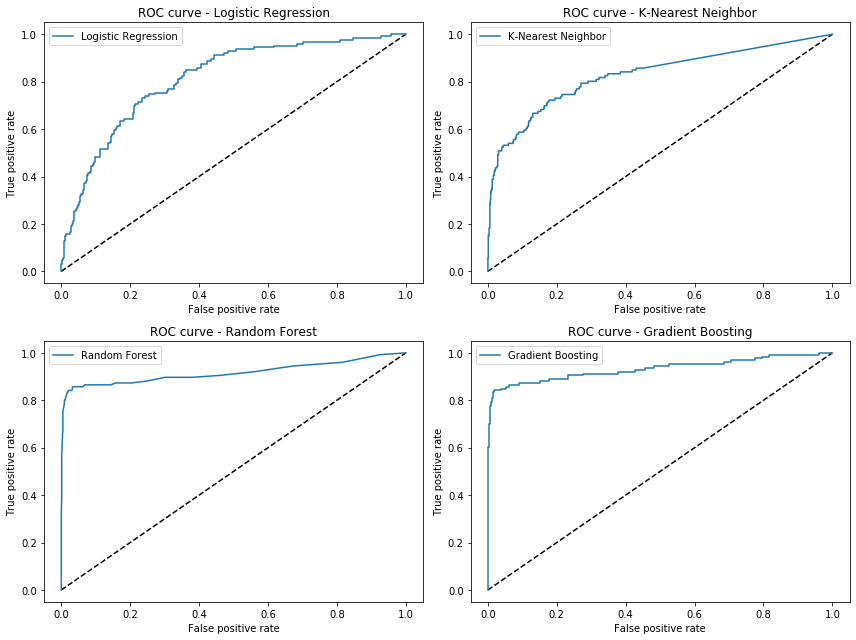

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fig, axes = plt.subplots(2,2, figsize=(12,9))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

# Use predict_proba to get the probability of sample being positive:
for i in range(len(best_models)):
    
    model_name = model_names[i]
    model = best_models[i]
    
    ## compute the probability of sample being positive:
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    ## compute false-positive rate, true-positive rate:
    fpr, tpr, _ = roc_curve(Y_test, pred_prob)
    
    ## compute AUC:
    print("AUC for " + model_name + ": ", metrics.auc(fpr, tpr))
    
    ## plot ROC curve:
    ROC_curve(model_name, axis[i], fpr, tpr)

plt.tight_layout()

## Part 3.5: Threshold affects the model !
## In the following part, we will determine the optimal threshold for Random Forest and Gradient Boosting.

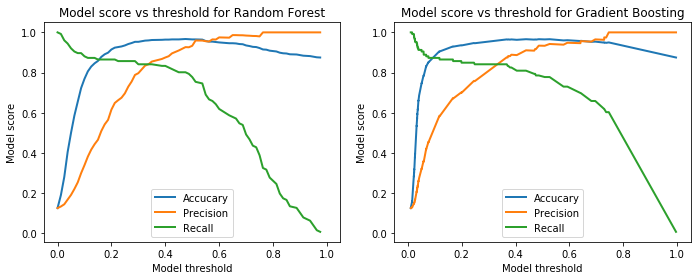

In [0]:
models = [best_models[2], best_models[3]]
model_names = ["Random Forest", "Gradient Boosting"]

fig, axes = plt.subplots(1,2, figsize=(10,4))

# define function for plotting curve:
def plot_curve(model_name, ax, x, name_y1, y1, name_y2, y2, name_y3, y3):
    ax.plot(x, y1, lw = 2, label = name_y1)
    ax.plot(x, y2, lw = 2, label = name_y2 )
    ax.plot(x, y3, lw = 2, label = name_y3)
    ax.set_xlabel('Model threshold')
    ax.set_ylabel('Model score')
    ax.set_title('Model score vs threshold for ' + model_name)
    ax.legend(loc='lower center')
    ax.set_xlim([-0.05, 1.05])
    return

for i in range(len(models)):
    ## pick up models and model names:
    model, model_name = models[i], model_names[i]
    ## initialize accuracy, precision and recall:
    accuracy, precision, recall = [], [], []
    ## compute probability of positive case:
    pred_prob = model.predict_proba(X_test)[:, 1]
    ## compute fpr, tpr and threshold:
    fpr, tpr, thresh = roc_curve(Y_test, pred_prob)
    for j in range(len(thresh)):
        accuracy.append(   accuracy_score(Y_test, pred_prob >= thresh[j]) )
        precision.append( precision_score(Y_test, pred_prob >= thresh[j]) )
        recall.append(       recall_score(Y_test, pred_prob >= thresh[j]) )
    
    accuracy, precision, recall = np.asarray(accuracy), np.asarray(precision), np.asarray(recall)
    plot_curve( model_name, axes[i], thresh[1:],\
                "Accucary", accuracy[1:],\
                "Precision", precision[1:],\
                "Recall", recall[1:] )

plt.tight_layout()
plt.show()


# Part 4: Feature Selection

In [0]:
columns = ['account_length','number_vmail_messages',
           'total_day_minutes','total_day_calls', 'total_day_charge',
           'total_eve_minutes','total_eve_calls', 'total_eve_charge',
           'total_night_minutes', 'total_night_calls', 'total_night_charge',
           'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
           'number_customer_service_calls']

## Part 4.1:  Random Forest Model - Feature Importance Discussion

In [0]:
# check feature importance of random forest:

rf_model = best_models[2]## random forest is the 3rd model

importances = rf_model.feature_importances_

# Print the feature ranking
print("Feature importance ranking from Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    if "state" in v or "area" in v:
        continue
    print (v + ": " + str(k))

Feature importance ranking from Random Forest Model:
total_day_minutes: 0.1335
total_day_charge: 0.1152
number_customer_service_calls: 0.1046
total_eve_minutes: 0.0578
total_eve_charge: 0.0545
total_intl_calls: 0.0512
total_intl_charge: 0.0454
total_intl_minutes: 0.0404
total_night_minutes: 0.0389
total_night_charge: 0.0365
intl_plan_0: 0.0357
intl_plan_1: 0.0327
account_length: 0.0306
total_day_calls: 0.0284
total_eve_calls: 0.0274
total_night_calls: 0.0269
number_vmail_messages: 0.0211
voice_mail_plan_1: 0.0129
voice_mail_plan_0: 0.0129
